In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from skimage import data
from skimage.util.shape import view_as_windows
from skimage.util._montage import montage
from skimage.util import view_as_blocks
from skimage.transform import resize
import matplotlib.pyplot as plt
from skimage.io import imread

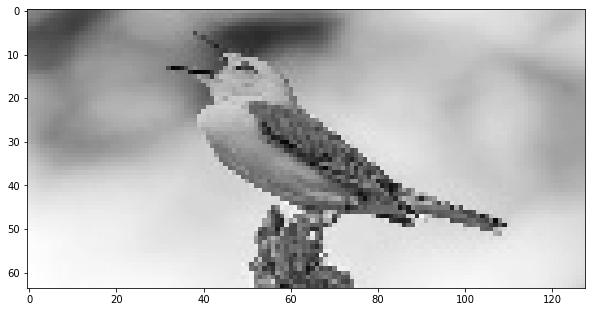

In [2]:
puzzle = imread("25.jpg", as_gray=True)
#puzzle = resize(puzzle,(1000,1000))

fig = plt.figure(figsize=(10,10))
plt.imshow(puzzle, cmap = "gray")

In [3]:
puzzle.shape

(64, 128)

(4, 32, 64)
<class 'numpy.ndarray'>


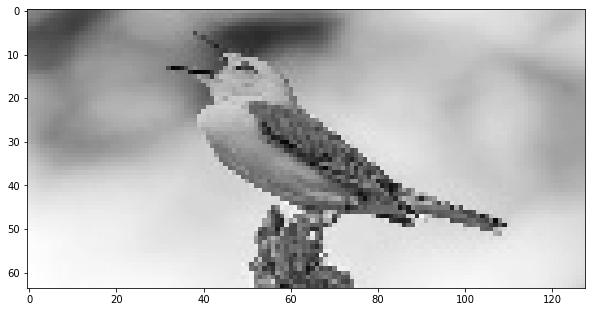

In [4]:
puzzle_shape = (32,64)
puzzle_blocks_orig = view_as_blocks(puzzle, block_shape=puzzle_shape)

puzzle_blocks = puzzle_blocks_orig
puzzle_blocks = puzzle_blocks.reshape((-1,)+puzzle_shape)
print(puzzle_blocks.shape)
#np.random.shuffle(puzzle_blocks)
puzzle_montagne = montage(puzzle_blocks)

print(type(puzzle_montagne))

fig = plt.figure(figsize=(10,10))
plt.imshow(puzzle_montagne, cmap = "gray")

In [5]:
puzzle_blocks

array([[[132, 126, 121, ..., 113, 114, 114],
        [124, 121, 116, ...,  99,  97,  96],
        [116, 113, 107, ...,  88,  87,  86],
        ...,
        [163, 156, 147, ...,  68,  89,  95],
        [167, 160, 151, ...,  99,  60,  93],
        [175, 168, 158, ...,  31, 108,  81]],

       [[114, 116, 117, ..., 184, 186, 189],
        [100, 102, 103, ..., 183, 187, 191],
        [ 86,  87,  87, ..., 184, 190, 196],
        ...,
        [ 61, 104, 107, ..., 155, 154, 154],
        [ 89,  79,  95, ..., 154, 154, 153],
        [ 97,  72,  88, ..., 155, 155, 155]],

       [[178, 172, 164, ...,  60,  52,  74],
        [183, 178, 171, ...,  70,  37,  39],
        [188, 183, 177, ..., 109,  75,  53],
        ...,
        [244, 244, 243, ...,  78,  56,  76],
        [244, 243, 243, ...,  63,  60,  64],
        [244, 243, 243, ..., 110,  92,  98]],

       [[ 86,  59,  75, ..., 155, 156, 155],
        [ 58,  42,  81, ..., 155, 157, 156],
        [ 52,  49,  42, ..., 156, 158, 158],
        ..

In [6]:
puzzle_dict = {0:puzzle_blocks[0], 1:puzzle_blocks[1],2:puzzle_blocks[2],3:puzzle_blocks[3]}

In [7]:
puzzle_dict

{0: array([[132, 126, 121, ..., 113, 114, 114],
        [124, 121, 116, ...,  99,  97,  96],
        [116, 113, 107, ...,  88,  87,  86],
        ...,
        [163, 156, 147, ...,  68,  89,  95],
        [167, 160, 151, ...,  99,  60,  93],
        [175, 168, 158, ...,  31, 108,  81]], dtype=uint8),
 1: array([[114, 116, 117, ..., 184, 186, 189],
        [100, 102, 103, ..., 183, 187, 191],
        [ 86,  87,  87, ..., 184, 190, 196],
        ...,
        [ 61, 104, 107, ..., 155, 154, 154],
        [ 89,  79,  95, ..., 154, 154, 153],
        [ 97,  72,  88, ..., 155, 155, 155]], dtype=uint8),
 2: array([[178, 172, 164, ...,  60,  52,  74],
        [183, 178, 171, ...,  70,  37,  39],
        [188, 183, 177, ..., 109,  75,  53],
        ...,
        [244, 244, 243, ...,  78,  56,  76],
        [244, 243, 243, ...,  63,  60,  64],
        [244, 243, 243, ..., 110,  92,  98]], dtype=uint8),
 3: array([[ 86,  59,  75, ..., 155, 156, 155],
        [ 58,  42,  81, ..., 155, 157, 156],
    

In [8]:
puzzle_blocks.shape
number_of_pieces=4

In [9]:
# Inputs of the equation.
equation_inputs = [i for i in range(number_of_pieces)]
# Number of the weights we are looking to optimize.
num_weights=[]
num_weights[:] = equation_inputs
num_weights

[0, 1, 2, 3]

In [10]:
import numpy as np
import random
sol_per_pop = 20
# Defining the population size.

pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#new_population=np.empty((sol_per_pop,9))
new_population=[]
#Creating the initial population.
for i in range(sol_per_pop):
    random.shuffle(num_weights)
    new_population.append(list(num_weights))
    #new_population[i] = num_weights


In [11]:
equation_inputs = np.array(equation_inputs)
equation_inputs.shape

(4,)

In [12]:
# the true array
print("Equation Inputs:",equation_inputs)

Equation Inputs: [0 1 2 3]


In [13]:
def cal_pop_fitness(equation_inputs, pop):
     # Calculating the fitness value of each solution in the current population.
     # The fitness function calculates the sum of products between each input and its corresponding weight.
    equation_inputs = np.array(equation_inputs)
    equation_inputs = equation_inputs[np.newaxis,:]
    
    pop = np.array(pop)
    reshape_pop = np.reshape(pop,(20,4))
    fitness = []
    
    for i in range(pop.shape[1]):
        count = (reshape_pop[:,i] == i).sum()
        fitness.append(count)
        
    return fitness,pop

In [14]:
# Control the fitness function
fitness, pop_array = cal_pop_fitness(equation_inputs, new_population)

print("Pop array:\n",pop_array)
print("Sum of true indexes for each column:", fitness)

Pop array:
 [[0 2 1 3]
 [3 2 0 1]
 [1 2 3 0]
 [1 3 0 2]
 [1 0 2 3]
 [3 2 1 0]
 [1 0 2 3]
 [0 1 2 3]
 [2 0 1 3]
 [3 0 2 1]
 [2 1 3 0]
 [2 0 3 1]
 [1 0 3 2]
 [2 3 1 0]
 [2 0 3 1]
 [0 3 1 2]
 [2 0 1 3]
 [2 0 3 1]
 [0 1 2 3]
 [1 0 2 3]]
Sum of true indexes for each column: [4, 3, 6, 8]


In [15]:
def select_mating_pool(pop, fitness, num_parents):

    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    
    pop=np.array(pop)    
    parents = np.empty((num_parents, pop.shape[1]))

    # A loop to extract one parent in each iteration
    for parent_num in range(num_parents):
        # Finding index of fittest chromosome in the population
        max_fitness_idx = np.where(fitness == np.min(fitness))
        # Extracting index of fittest chromosome
        max_fitness_idx = max_fitness_idx[0][0]
        # Copying fittest chromosome into parents array
        parents[parent_num, :] = pop[max_fitness_idx, :]

    return parents

In [16]:
num_parents=2
parents=select_mating_pool(new_population, fitness, num_parents)

In [17]:
def crossover(a, b, crossover_point):
    a1=[0]*4
    a1[:crossover_point] = a[:crossover_point]
    #print(a1)
    i=crossover_point-1
    for gene in b:
        #print(a1)
        if(gene not in a1):
            a1[i] = gene
            i+=1
            return a1

In [18]:
# shuffle each individual
def mutation(offsprings):
    np.random.shuffle(offsprings)
    return offsprings

In [19]:
# plotting each puzzle

from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image,ImageOps

def plot_puzzle(puzzle_list):
    
    images = [puzzle_dict[i] for i in puzzle_list]

    fig = plt.figure(figsize=(15., 15.))
    grid = ImageGrid(fig, 111,nrows_ncols=(2, 2),axes_pad=0.1,)

    for ax, im in zip(grid, images):
        ax.imshow(im,cmap = "gray")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
   

    plt.show()
    
    return fig


crossover_offspring [3. 2. 1. 0.]
offspring_mutation [0. 3. 1. 2.]


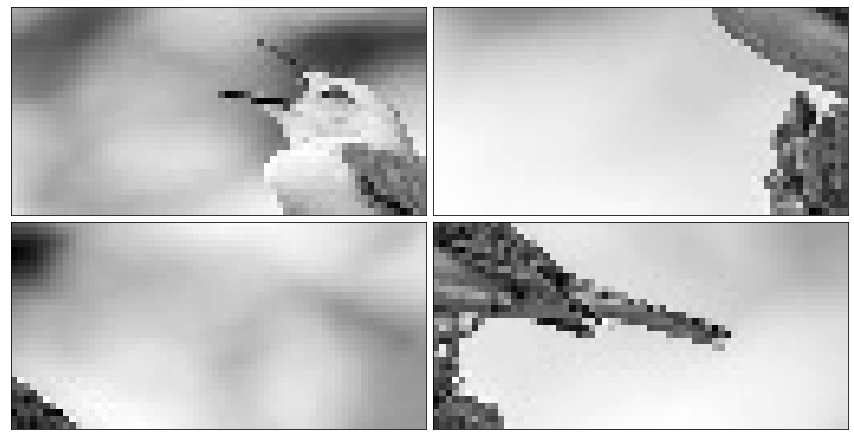

-----------


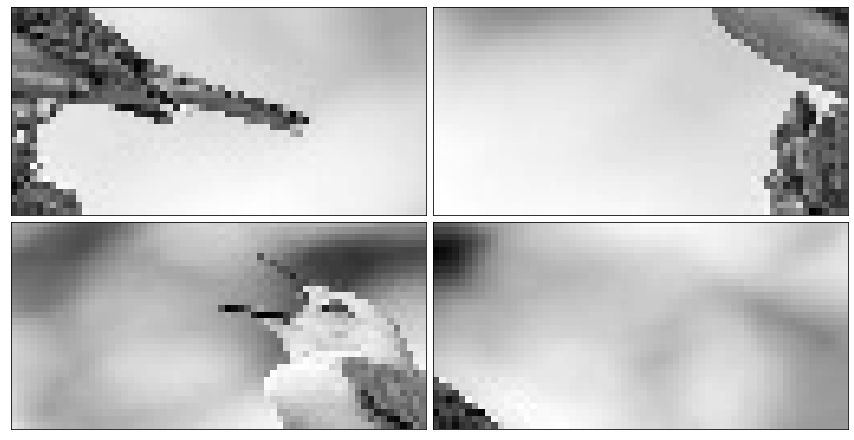

-----------


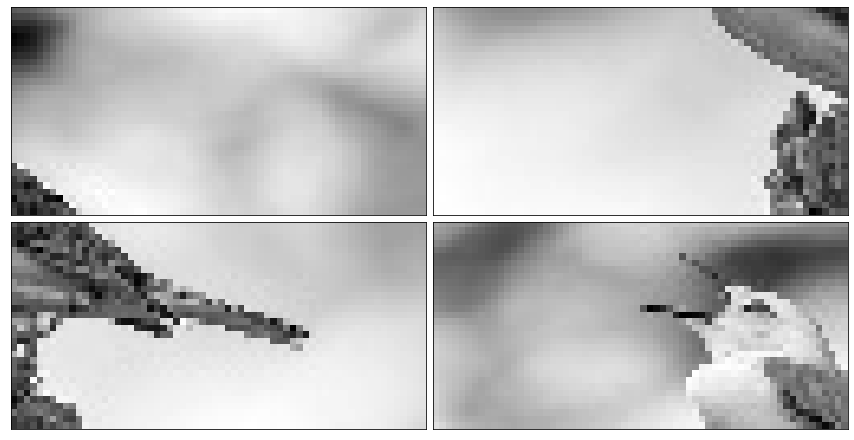

-----------


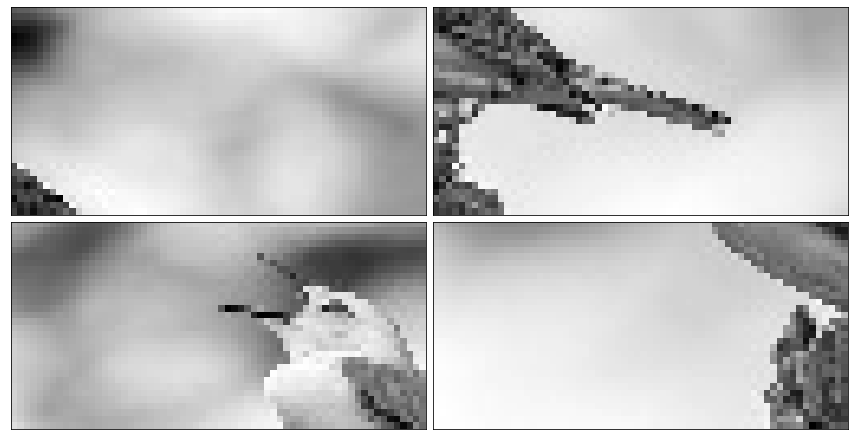

-----------


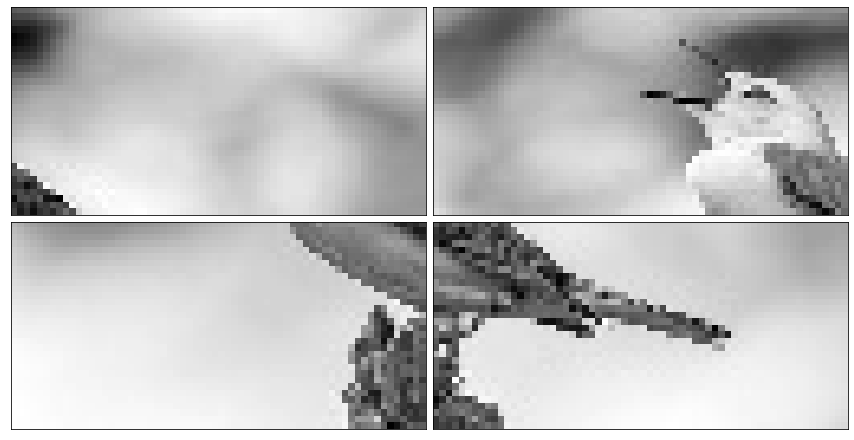

-----------


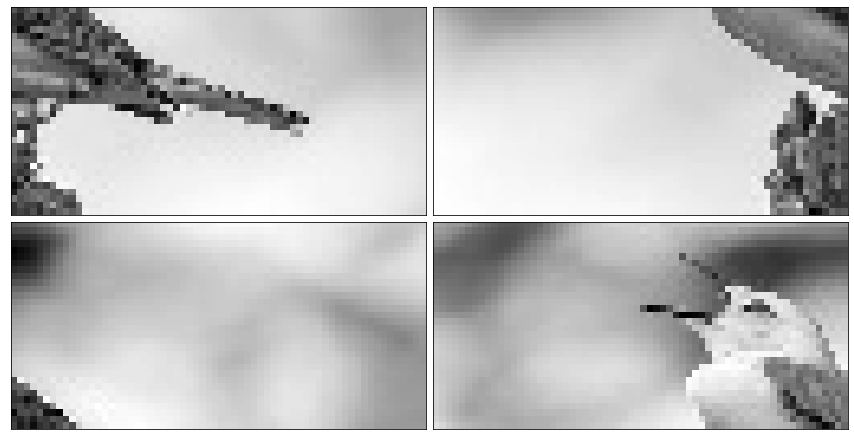

-----------


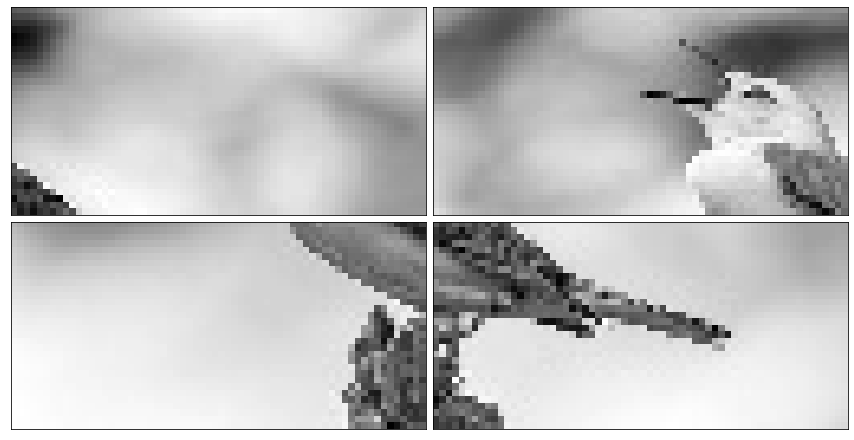

-----------


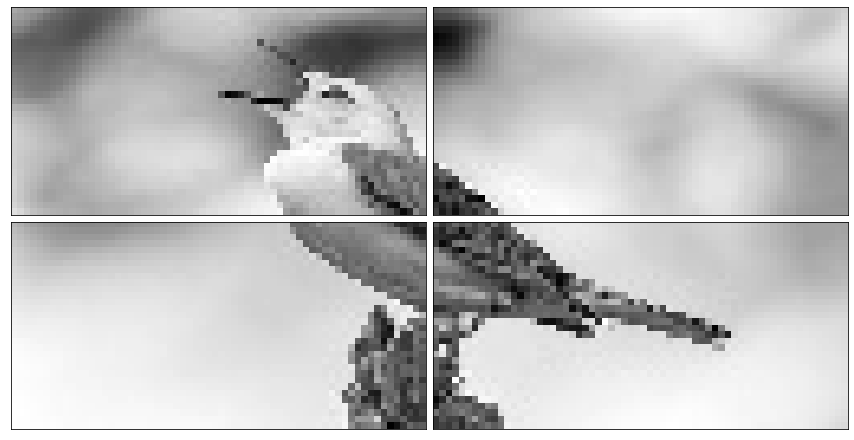

-----------


In [20]:
from PIL import Image
import matplotlib.pyplot as plt

num_generations = 20

num_parents_mating = 2


#print(cal_pop_fitness(equation_inputs, new_population))   

for generation in range(num_generations):
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)

    
    offspring_crossover = np.array(crossover(parents[0],parents[1],3))
    #offspring_crossover = offspring_crossover.astype(int)
    
    print("crossover_offspring",offspring_crossover)
    offspring_mutation = mutation(offspring_crossover) 
    print("offspring_mutation",offspring_mutation)
    
    for i in new_population:
        
        figure = plot_puzzle(i)
        figure.savefig("C://Users//Elessar//Desktop//ai_images//deneme//img" + str(generation) + ".jpg")
        print("-----------")
        if ((equation_inputs == i).sum()) == len(equation_inputs):
            break 
    
    break
    

    
    


    
    